In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [25]:
adjacency_matrix = np.array([[-1, 1, 1, 0], [0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 0, -1]])
print(adjacency_matrix)

[[-1  1  1  0]
 [ 0  0  0  1]
 [ 0  0  0  1]
 [ 0  0  0 -1]]


In [26]:
G = nx.Graph(adjacency_matrix, nodetype=int)
G.edges()

EdgeView([(0, 0), (0, 1), (0, 2), (1, 3), (2, 3), (3, 3)])

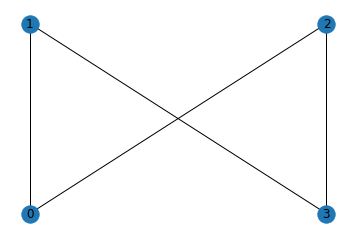

In [27]:
plt.axis('off')
#pos = nx.random_layout(G)
pos = np.array([[-1, -1], [-1, 1], [1, 1], [1, -1]])
#print(pos)
nx.draw_networkx(G,pos)
plt.show()

In [28]:
from dwave.system import DWaveSampler, EmbeddingComposite, DWaveCliqueSampler
import dimod
import dwave.inspector

bqm = dimod.from_networkx_graph(G, vartype='BINARY', edge_attribute_name='weight', node_attribute_name='weight')

sampleset = EmbeddingComposite(DWaveSampler()).sample(bqm, num_reads=10000, label='checkerboard', chain_strength=-5)

In [29]:
sampleset.variables
sampleset.record

rec.array([([1, 0, 0, 1], -2., 9999, 0.), ([0, 0, 0, 1], -1.,    1, 0.)],
          dtype=[('sample', 'i1', (4,)), ('energy', '<f8'), ('num_occurrences', '<i8'), ('chain_break_fraction', '<f8')])

In [30]:
res = np.zeros(len(sampleset.record)) 
s = 0

for k, rec in enumerate(sampleset.record):
    states = rec[0]
    print(states)
    for i, sol in enumerate(states):
        p = int(sampleset.variables[i])

r=sampleset.record.num_occurrences
idx=np.argmax(r)
print(idx,r)
solution=sampleset.record
#print(solution)

[1 0 0 1]
[0 0 0 1]
0 [9999    1]


<Container object of 2 artists>

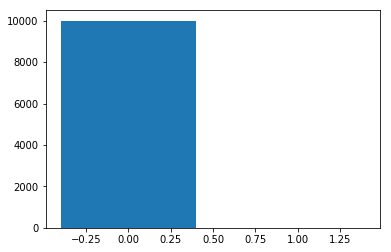

In [31]:
plt.bar(range(len(solution)),r)

In [9]:
dwave.inspector.show(sampleset)

'http://127.0.0.1:18000/?problemId=d9a0d4c2-869e-4393-931f-b42a12657e2f'